In [44]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import random
import matplotlib.pyplot as plt

In [3]:
n = sum(1 for line in open('flights.csv'))

In [4]:
n

5819080

In [5]:
s = 300000

In [6]:
skip = sorted(random.sample(range(1,n+1),n-s))

In [7]:
# Citamo 300000 nasumicno izabranih redova
p = pd.read_csv('flights.csv', skiprows=skip, low_memory=False)

In [8]:
p

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,NK,520,N525NK,LAS,MCI,55,...,543.0,6.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AS,114,N303AS,ANC,SEA,220,...,628.0,-12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,B6,2807,N190JB,PWM,JFK,535,...,635.0,-25.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,F9,161,N905FR,MSN,DEN,544,...,658.0,-11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,UA,1237,N65832,SEA,IAH,545,...,1207.0,11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,US,635,N544UW,SMF,PHX,600,...,902.0,12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,1,4,WN,4122,N486WN,BOS,BWI,600,...,719.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4,WN,2787,N910WN,PIT,FLL,600,...,824.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,1,4,AA,196,N3FBAA,MIA,PHL,600,...,858.0,14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,1,4,AA,1100,N3GWAA,DFW,LGA,600,...,1005.0,-5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
delay = p['ARRIVAL_DELAY'] > 15
delay_flights = p[delay]
delay_flights['DELAY'] = True

not_delay = p['ARRIVAL_DELAY'] <= 15
not_delay_flights = p[not_delay]
not_delay_flights['DELAY'] = False

not_delay_flights = not_delay_flights.sample(len(delay_flights))

# Pravimo skup koji ima jednak broj letova koi kasne i onih koji ne kasne
flights = delay_flights.append(not_delay_flights, ignore_index=True)
flights

/home/anja/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/anja/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [14]:
len(flights)

105586

In [20]:
# Biramo atribute koji su nam zanimljivi
flights_new = flights[['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE', 'SCHEDULED_ARRIVAL', 'DELAY']]
flights_new

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,TAXI_OUT,DISTANCE,SCHEDULED_ARRIVAL,DELAY
0,1,1,4,NK,ACY,RSW,600,102.0,10.0,982,851,True
1,1,1,4,NK,DTW,LGA,600,-2.0,11.0,502,738,True
2,1,1,4,MQ,DCA,JFK,615,164.0,10.0,213,718,True
3,1,1,4,UA,AUS,IAH,630,28.0,18.0,140,731,True
4,1,1,4,UA,PHX,SFO,650,61.0,27.0,651,804,True
5,1,1,4,AS,BUR,SEA,700,124.0,10.0,937,930,True
6,1,1,4,B6,RDU,BOS,700,-13.0,45.0,612,849,True
7,1,1,4,OO,ORF,ORD,720,-1.0,28.0,717,840,True
8,1,1,4,DL,JFK,MSP,800,35.0,26.0,1029,1023,True
9,1,1,4,NK,FLL,ACY,800,15.0,12.0,977,1025,True


In [21]:
# Kategoricke atribute prebacujemo u numericke -> one hot 

pd.get_dummies(flights_new, columns=["AIRLINE","ORIGIN_AIRPORT", "DESTINATION_AIRPORT"])

,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,TAXI_OUT,DISTANCE,SCHEDULED_ARRIVAL,DELAY,AIRLINE_AA,...,DESTINATION_AIRPORT_TYR,DESTINATION_AIRPORT_TYS,DESTINATION_AIRPORT_VEL,DESTINATION_AIRPORT_VLD,DESTINATION_AIRPORT_VPS,DESTINATION_AIRPORT_WRG,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM
0,1,1,4,600,102.0,10.0,982,851,True,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,4,600,-2.0,11.0,502,738,True,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,4,615,164.0,10.0,213,718,True,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,4,630,28.0,18.0,140,731,True,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,4,650,61.0,27.0,651,804,True,0,...,0,0,0,0,0,0,0,0,0,0
5,1,1,4,700,124.0,10.0,937,930,True,0,...,0,0,0,0,0,0,0,0,0,0
6,1,1,4,700,-13.0,45.0,612,849,True,0,...,0,0,0,0,0,0,0,0,0,0
7,1,1,4,720,-1.0,28.0,717,840,True,0,...,0,0,0,0,0,0,0,0,0,0
8,1,1,4,800,35.0,26.0,1029,1023,True,0,...,0,0,0,0,0,0,0,0,0,0
9,1,1,4,800,15.0,12.0,977,1025,True,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# Previse kolona, izbacujemo destination i origin airport

In [23]:
flights_new = flights[['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE', 'SCHEDULED_ARRIVAL', 'DELAY']]

In [24]:
flights_ready = pd.get_dummies(flights_new, columns=["AIRLINE"])

In [25]:
flights_ready

,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,TAXI_OUT,DISTANCE,SCHEDULED_ARRIVAL,DELAY,AIRLINE_AA,...,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,AIRLINE_US,AIRLINE_VX,AIRLINE_WN
0,1,1,4,600,102.0,10.0,982,851,True,0,...,0,0,0,0,1,0,0,0,0,0
1,1,1,4,600,-2.0,11.0,502,738,True,0,...,0,0,0,0,1,0,0,0,0,0
2,1,1,4,615,164.0,10.0,213,718,True,0,...,0,0,0,1,0,0,0,0,0,0
3,1,1,4,630,28.0,18.0,140,731,True,0,...,0,0,0,0,0,0,1,0,0,0
4,1,1,4,650,61.0,27.0,651,804,True,0,...,0,0,0,0,0,0,1,0,0,0
5,1,1,4,700,124.0,10.0,937,930,True,0,...,0,0,0,0,0,0,0,0,0,0
6,1,1,4,700,-13.0,45.0,612,849,True,0,...,0,0,0,0,0,0,0,0,0,0
7,1,1,4,720,-1.0,28.0,717,840,True,0,...,0,0,0,0,0,1,0,0,0,0
8,1,1,4,800,35.0,26.0,1029,1023,True,0,...,0,0,0,0,0,0,0,0,0,0
9,1,1,4,800,15.0,12.0,977,1025,True,0,...,0,0,0,0,1,0,0,0,0,0


In [26]:
# Cuvamo podatke za dalju upotrebu
flights_ready.to_csv('flights_small.csv')

In [66]:
obj_df1 = delay_flights.select_dtypes(include=['object']).copy()
obj_df1

,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,CANCELLATION_REASON
16,NK,N605NK,ACY,RSW,NaN
17,NK,N601NK,DTW,LGA,NaN
27,MQ,N546MQ,DCA,JFK,NaN
30,UA,N404UA,AUS,IAH,NaN
41,UA,N832UA,PHX,SFO,NaN
46,AS,N529AS,BUR,SEA,NaN
50,B6,N283JB,RDU,BOS,NaN
63,OO,N748SK,ORF,ORD,NaN
85,DL,N711ZX,JFK,MSP,NaN
87,NK,N622NK,FLL,ACY,NaN


In [67]:
list_delayed = obj_df1['AIRLINE'].value_counts()

In [72]:
obj_df2 = p.select_dtypes(include=['object']).copy()
obj_df2

,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,CANCELLATION_REASON
0,NK,N525NK,LAS,MCI,NaN
1,AS,N303AS,ANC,SEA,NaN
2,B6,N190JB,PWM,JFK,NaN
3,F9,N905FR,MSN,DEN,NaN
4,UA,N65832,SEA,IAH,NaN
5,US,N544UW,SMF,PHX,NaN
6,WN,N486WN,BOS,BWI,NaN
7,WN,N910WN,PIT,FLL,NaN
8,AA,N3FBAA,MIA,PHL,NaN
9,AA,N3GWAA,DFW,LGA,NaN


In [73]:
list_total = obj_df2['AIRLINE'].value_counts()

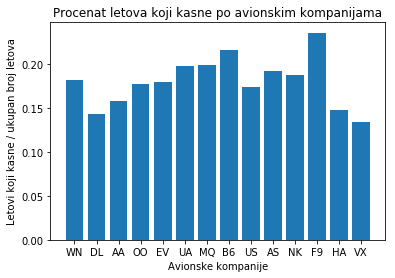

In [77]:
# Slika koja predstavlja procenat letova koji kasne po avio kompanijama
plt.bar(['WN', 'DL', 'AA', 'OO', 'EV', 'UA', 'MQ', 'B6', 'US', 'AS', 'NK', 'F9', 'HA', 'VX'], list_delayed.values / list_total.values)
plt.title("Procenat letova koji kasne po avionskim kompanijama")
plt.xlabel("Avionske kompanije")
plt.ylabel("Letovi koji kasne / ukupan broj letova")
plt.savefig('aviokompanije.png')
plt.show()